In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
pand = pd.read_csv('wine.csv', sep=';')

Wines = list()
TypeModels = list()
pand

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5,6
1195,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5,6
1196,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5,6
1197,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8,6


<h2>a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp <br>
y=theta_1x_1+theta_2x_2+...+theta_11x_11</h2>

Class TypeModel would define the Model of Polymonial in various type, such as Log(x) or X^2.

Example: <br>
    y = O + Ox + Ox^2 => this model using type of Pow <br><br>
    which means:<br>
        Y = TypeModel("pow", 0, 1) + TypeModel("pow", 1, 1) + TypeModel("pow", 2, 1)

In [22]:
class TypeModel:
    def __init__(self, type, level, numeric):
        self.type = type # this would define type off Polynomial, including power or logaric
        self.level = level  # this would define the level of that type, ex: (power, 2) => a**2
        self.numeric = numeric # this would define the extra numeric that X should be mul, ex: 2x => 2 is numeric
    
    def getValue(self, value):
        if (self.type=="none"):
            return value
        if (self.type=="pow"):
            return self.numeric*(value**self.level)
        if (self.type=="ln"):
            return self.numeric*(np.log(value))**self.level
        if (self.type=="log"):
            return self.numeric*(np.log10(value))**self.level
        return value

<h4>RSS, TSS and MSE (Mean Square Error) of Model</h4>

In [23]:
def RSS(x, y, theta):
    return np.linalg.norm(np.dot(x, theta) - y, 2) ** 2

def TSS(y):
    return np.linalg.norm(y - y.mean()) ** 2

def R2_Score(x, y, theta):
    return 1 - (RSS(x, y, theta) / TSS(y))

def MSE(x, y, theta):
    return np.linalg.norm((np.dot(x, theta) - y), 2) ** 2 / len((np.dot(x, theta) - y))

Class Wine would be the one that stored all the attributes of that bottle of wine and serveral functions.

In [24]:
class Wine:
    def __init__(self, listValues):
        self.ListValues = listValues
        self.FixedAcidity = listValues[0]
        self.VolatileAcidity = listValues[1]
        self.CitricAcid = listValues[2]
        self.ResidualSugar = listValues[3]
        self.Chlorides = listValues[4]
        self.FreeSulfurDioxide = listValues[5]
        self.TotalSulfurDioxide = listValues[6]
        self.Density = listValues[7]
        self.Ph = listValues[8]
        self.Sulphates = listValues[9]
        self.Alcoh = listValues[10]
        self.Quality = listValues[11]
        self.ListValues.pop()
    
    def getSumAll(self):
        return sum(map(float,self.ListValues)) - self.getValueAt(len(self.ListValues)-1)

    def getNameAt(index):
        name = ["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar","Chlorides","Free Sulfur Dioxide","Total Sulfur Dioxide","Density","Ph","Sulphates", "Alcoh"]
        return name[index]

    def getValueAt(self, index):
        return self.ListValues[index]

From here, I read file and stored all the information into list of OOP for later using. <br>
Wine -> list of Wine (Wines)

In [25]:
alist = [line.rstrip() for line in open('wine.csv')]
alist.pop(0)

for line in alist:
    values = line.split(';')
    values = [float(value) for value in values]
    Wines.append(Wine(values))

DataFiting would be the class that operate most of calculations of algorithm to find out the neccessary variable, including drawing.

In [26]:
#model.fit()_
class DataFiting:
    def __init__(self, listX, listY, TypeModelList, TypeY):
        self.x = listX
        self.y = listY
        self.f = list()
        self.a = list()
        self.b = list()
        self.npA = np.array(())
        self.npB = np.array(())
        self.typeList = TypeModelList
        self.typeY = TypeY
    
    def SettingNormR(self):
        for i in range(len(self.typeList)):
            self.f.append(list())
            if (i==0):
                self.f[i] = [1 for i in range(len(self.x))]
            else:
                self.f[i] = [self.typeList[i].getValue(value) for value in self.x]
            self.f[i] = np.asarray(self.f[i], dtype=np.float64)
            self.a.append(self.f[i])

        self.npA = np.asarray(self.a, dtype=np.float64)
        self.npA = self.npA.T

        self.y = np.asarray(
            [self.typeY.getValue(value) for value in self.y],  
            dtype=np.float64
        )
        self.npB = self.y.reshape(len(self.y), 1)
        
    def CalculateTheta(self):
        self.theta = np.linalg.inv(self.npA.T@self.npA)@(self.npA.T@self.npB)
        self.r = np.linalg.norm(self.npA@self.theta-self.npB)
        n = np.linspace(min(self.x), max(self.x), 50)
        m = [sum([self.theta[i]*self.typeList[i].getValue(xValue) for i in range(len(self.typeList))]) for xValue in n]
        return self.r, self.x, self.y, n, m
    
    def getMSE(self):
        return MSE(self.npA, self.npB, self.theta)
    
    def getR2(self):
        return R2_Score(self.npA, self.npB, self.theta)
    
    def getR(self): 
        return self.r

class Visualization:
    def __init__(self) -> None:
        pass
    def Draw(x, y, n, m):
        plt.plot(x, y, 'o', color="blue")
        plt.plot(n, m, color="red")
        plt.show()

Here is the initialization of the whole operation, x and y would be read from the list of Wines stored before. All the TypeModel would be inited in here too.

In [27]:
x = [wine.getSumAll() for wine in Wines]
a = np.array([np.array(wine.ListValues) for wine in Wines])


y = np.asarray([wine.Quality for wine in Wines], dtype=np.float64)
b = y.reshape(len(y), 1)

for i in range(10):
    TypeModels.append(TypeModel("none", 1, 1))
TypeY = TypeModel("none", 1, 1)

In [28]:
df = DataFiting(x, y, TypeModels, TypeY)
df.npA, df.npB = a, b
r, x, y, n, m = df.CalculateTheta()

print("The R of all 11 attritions is %0.6f" % r)
print("The R2_score of all 11 attritions is %0.6f" % df.getR2())
print("The MSE of all 11 attritions is %0.6f" % df.getMSE())
#Visualization.Draw(x, y, n, m)

The R of all 11 attritions is 22.124346
The R2_score of all 11 attritions is 0.376623
The MSE of all 11 attritions is 0.408246


<h2>b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất. (Gợi ý: Phương pháp Cross Validation)<br>
y=theta_ix_i (dùng mô hình lần lượt cho từng đặc trưng).</h2>

This FC class would determine the operation of K_Fold Cross_validation, in which the main data would be split into Test and Train data. <br>
<br>
(80%) Data => Train_data <br>
(20%) Data => Test_data <br>
<br>
SetModel(): Ramdomly searching several Polynomials<br>
Find_Best_Model(): From several testing for Polymials, the best one with smallest R would be chosen.<br>
TestModel(): this would test any Datafitting on particular Model

In [29]:
class Fold_CrossValidation:
    def __init__(self) -> None:
        pass

    def percentage(self, value, percent):
        return (percent*value)/100

    def SplitData(self, Data, size):
        result = list(list())
        cols, rows  = 0, 0
        for _ in range(0, len(Data), size):
            result.append(list())
            for _ in range(size):
                result[rows].append(Data[cols])
                cols+=1
                if (cols>=len(Data)): 
                    return result
            rows+=1
        return result

    def Set_Model(self, sX, sY, maxLevel, type):
        minR = 9999999
        for level in range(1, maxLevel):
            typeX = list()
            # searching random Polynominal from 1 to max level of pow
            for i in range(level):
                typeX.append(TypeModel(type, i, 1))
            typeY = TypeModel("none", 1, 1)
            try: 
                df = DataFiting(sX, sY, typeX, typeY)
                df.SettingNormR()
                r,x,y,n,m = df.CalculateTheta()
            except: continue
            if (r<minR):
                minR = r
                FinalModelX = typeX
        return FinalModelX, minR

    def Find_Best_Model(self, sX, sY, splitCase, maxLevel, isVisual=True):
        Model_x_Pow, R1 = self.Set_Model(sX, sY, maxLevel, "pow")
        return Model_x_Pow


    def Test_Model(self, x, y, model):
        df = DataFiting(x, y, model, TypeModel("none",1,1))
        df.SettingNormR()
        R = df.CalculateTheta()[0]
        return R

Below is the Main treatment, from here, I would split the train_data into K sets, from each set, randomly searching the best model for it and then test that model on the Test_data. <br>
<br>
From the list of Test_data_value, the Minimum one would be chosen and its Polynomial either.
<br><br>
Apply that model to find out best Attribution via testing each one

In [30]:
Fold = Fold_CrossValidation()
limit = int(Fold.percentage(len(Wines), 80))
K_of_Fold = 10

TRAIN = [Wines[i] for i in range(limit)]
TEST = [Wines[i] for i in range(limit, len(Wines))]
SPLIT = Fold.SplitData(TRAIN, K_of_Fold)

#here is the searching of all splited Train_data to find out best model
final_R = 9999999999
for i in range(len(SPLIT)):
    train_X = [wine.getSumAll() for wine in SPLIT[i]]
    train_Y = [wine.Quality for wine in SPLIT[i]]
    TypeModelX = Fold.Find_Best_Model(train_X, train_Y, SPLIT[i], 8)
    
    test_X = [wine.getSumAll() for wine in TEST]
    test_Y = [wine.Quality for wine in TEST]
    test_r = Fold.Test_Model(test_X, test_Y, TypeModelX)

    if (test_r < final_R):
        final_R, final_model = test_r, TypeModelX

#After figure out the best model, we would use that to test on 11 attributions
final_R, index = 9999999999, -1
for i in range(11):
    full_x = [wine.getValueAt(i) for wine in Wines]
    full_y = [wine.Quality for wine in Wines]
    df = DataFiting(full_x, full_y, final_model, TypeModel("none",1,1))
    df.SettingNormR()
    result = df.CalculateTheta()
    if (result[0]<final_R):
        final_R = result[0]
        index = i
    print(f"Applying {Wine.getNameAt(i)}: {result[0]}")
    # print(result[0])
    # Visualization.Draw(result[1], result[2], result[3], result[4])

print(f"\nIn conclusion, the value of {Wine.getNameAt(index)} is most reasonable")

Applying Fixed Acidity: 27.432522193510597
Applying Volatile Acidity: 25.656287860138832
Applying Citric Acid: 26.903066857324546
Applying Residual Sugar: 27.96342498555161
Applying Chlorides: 27.417483906336418
Applying Free Sulfur Dioxide: 27.869545843872533
Applying Total Sulfur Dioxide: 26.997711844443504
Applying Density: 131.66170288560784
Applying Ph: 358.63414686394435
Applying Sulphates: 25.813472739984714
Applying Alcoh: 23.955182217703545

In conclusion, the value of Alcoh is most reasonable


<h2>c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.</h2>

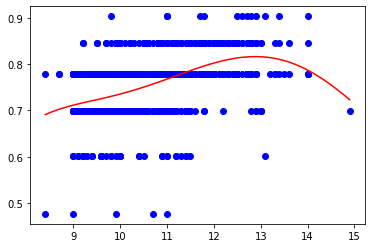

The R of Model is 1.877051
The R2_score of Model is 0.247360
The MSE of Model is 0.002939


In [31]:
# thank to the answer of question b, we define that values[index] (acohol) would be the best test case here
x = [wine.getValueAt(index) for wine in Wines]
y = [wine.Quality for wine in Wines]

# utilize the Searching Model functions from the class of k_fold to get a reasonable model
ModelX = Fold.Set_Model(x, y, 10, "pow")[0]
TypeY = TypeModel("log", 1, 1)

df = DataFiting(x, y, ModelX, TypeY)
df.SettingNormR()
r, x, y, n, m = df.CalculateTheta()
Visualization.Draw(x, y, n, m)

print("The R of Model is %0.6f" % df.getR())
print("The R2_score of Model is %0.6f" % df.getR2())
print("The MSE of Model is %0.6f" % df.getMSE())